In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.imputation.mice import MICEData

In [28]:
df= pd.read_excel('Imp.xlsx')

In [29]:
df.head()

,Date,AIRPASSENGER,PAYROLL,CPINF,NAUKRIJSI,NFC,NEXPORTS,POWERSS,BRMONEY,TOURISTS,BALTIC,PORTCARGO,IIP,NGIMPORTS,AIRCARGO,GDP
0,2004-04-01,2.911812e+06,131411,55.297146,NaN,8.127052e+06,5.383106,NaN,2.019015e+07,271418.762163,4290.991863,29073.234583,57.922304,3.660114,35439.210500,NaN
1,2004-05-01,3.074961e+06,131694,55.961392,NaN,8.255568e+06,5.466796,NaN,2.041186e+07,270845.010983,3762.759726,28827.548260,56.998587,3.926856,35819.351688,NaN
2,2004-06-01,3.194825e+06,131793,56.545532,NaN,8.443606e+06,5.740818,NaN,2.061865e+07,293303.870760,3396.729609,29675.382171,56.686763,4.300907,36675.832975,1.193183e+07
3,2004-07-01,3.216875e+06,131848,56.935544,NaN,8.549698e+06,5.636666,NaN,2.066173e+07,294122.930042,3944.230274,31629.856412,59.207810,4.285990,37877.068996,NaN
4,2004-08-01,3.243982e+06,131937,56.889570,NaN,8.782557e+06,5.430072,NaN,2.085519e+07,306200.363902,4124.849605,31777.756717,60.168511,4.387484,41145.121521,NaN


In [30]:
imp=MICEData(data=df,perturbation_method='boot',k_pmm=10)

j=0
df_dict={}

for j in range(20):
  imp.update_all(n_iter=20)
  df_dict[j]=pd.DataFrame(imp.data)

In [31]:
df_GDP_quat=pd.DataFrame()

In [32]:
for i in range(20):
  df_GDP_quat.insert(i,i,df_dict[i]['GDP'])

In [33]:
df_GDP_quat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07
1,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07,1.401312e+07
2,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07,1.193183e+07
3,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07,1.306594e+07
4,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07,1.303241e+07


In [34]:
df_GDP_quat['estimate']=(1/20)*(df_GDP_quat[0]+df_GDP_quat[1]+df_GDP_quat[2]+df_GDP_quat[3]+df_GDP_quat[4]+
                                df_GDP_quat[5]+df_GDP_quat[6]+df_GDP_quat[7]+df_GDP_quat[8]+df_GDP_quat[9]+
                                df_GDP_quat[10]+df_GDP_quat[11]+df_GDP_quat[12]+df_GDP_quat[13]+df_GDP_quat[14]+
                                df_GDP_quat[15]+df_GDP_quat[16]+df_GDP_quat[17]+df_GDP_quat[18]+df_GDP_quat[19])

In [35]:
df_GDP_quat['estimate']

0      1.306594e+07
1      1.401312e+07
2      1.193183e+07
3      1.306594e+07
4      1.303241e+07
           ...     
213    3.516058e+07
214    3.626220e+07
215    4.078025e+07
216    4.078025e+07
217    3.546223e+07
Name: estimate, Length: 218, dtype: float64

In [36]:
df_GDP_quat['GDP']=df['GDP']

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

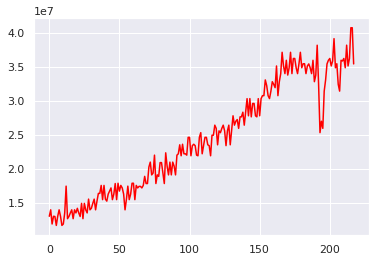

In [38]:
plt.plot(df_GDP_quat['estimate'],color='red')

In [39]:
from numpy.ma.core import sqrt
df_quat_modelEval=pd.DataFrame({'GDP':list(df_GDP_quat['GDP']),'estimate':list(df_GDP_quat['estimate'])})
df_quat_modelEval.dropna(axis=0,inplace=True)
print(mean_squared_error(df_quat_modelEval['GDP'],df_quat_modelEval['estimate']))
print(mean_absolute_error(df_quat_modelEval['GDP'],df_quat_modelEval['estimate']))
print(mean_absolute_percentage_error(df_quat_modelEval['GDP'],df_quat_modelEval['estimate']))
print(sqrt(mean_squared_error(df_quat_modelEval['GDP'],df_quat_modelEval['estimate'])))

5.522203065192836e-17
5.846636162863837e-09
2.428465855124736e-16
7.431152713538348e-09


In [40]:
df_quat_modelEval.head()

,GDP,estimate
2,1.193183e+07,1.193183e+07
5,1.172184e+07,1.172184e+07
8,1.306594e+07,1.306594e+07
11,1.355801e+07,1.355801e+07
14,1.303241e+07,1.303241e+07


In [41]:
df_GDP_quat.to_csv('Estimated_value.csv')